### Section 1.4.4 Linear Regulator
Taken from "Switch-Mode Power Supplies" by Christophe P. Basso

In [2]:
# Imports, type aliases

import tomllib
from pathlib import Path
from typing import Any

import numpy as np
import py4spice as spi

# Aliases for type checking
from py4spice.globals_types import numpy_flt

In [3]:
# Constants

CONFIG_FILENAME = Path("/workspaces/py4spice/circuits/config.toml")
PROJECT_SECTION = "SEC_1_04_04"


class Key:
    """Keys for dictionaries.  Defined here at top level so they can be
    referenced instead of using strings for keys.
    """

    # Keys for decoding config file
    GLOBAL = "GLOBAL"
    PROJECT = "PROJECT"
    NGSPICE_EXE_STR = "NGSPICE_EXE_STR"
    NETLISTS_DIR_STR = "NETLISTS_DIR_STR"
    RESULTS_DIR_STR = "RESULTS_DIR_STR"
    SIM_TRANSCRIPT_STR = "SIM_TRANSCRIPT_STR"
    PROJ_PATH_STR = "PROJ_PATH_STR"

    # Keys for the paths_dict
    NGSPICE_EXE = "ngspice_exe"
    PROJ_PATH = "proj_path"
    NETLISTS_PATH = "netlists_path"
    RESULTS_PATH = "results_path"
    SIM_TRANSCRIPT_FILENAME = "sim_transcript_filename"

    # Keys for the netlists_dict
    BLANKLINE = "blankline"
    TITLE = "title"
    END_LINE = "end_line"
    LOAD1 = "load1"
    LOAD2 = "load2"
    LOAD3 = "load3"
    LOAD4 = "load4"
    LOAD5 = "load5"
    LOAD6 = "load6"
    LOAD7 = "load7"
    STIMULUS1 = "stimulus1"
    STIMULUS2 = "stimulus2"
    STIMULUS3 = "stimulus3"
    STIMULUS4 = "stimulus4"
    STIMULUS5 = "stimulus5"
    STIMULUS6 = "stimulus6"
    STIMULUS7 = "stimulus7"
    SUPPLIES = "supplies"
    MODELS = "models"
    DUT = "dut"
    RC = "rc"
    RF = "rf"
    CF = "cf"
    RF_470K = "rf_470k"
    COUT = "cout"
    CONTROL1 = "control1"
    CONTROL2 = "control2"
    CONTROL3 = "control3"
    CONTROL4 = "control4"
    CONTROL5 = "control5"
    CONTROL6 = "control6"
    CONTROL7 = "control7"
    TOP1 = "top1"
    TOP2 = "top2"
    TOP3 = "top3"
    TOP4 = "top4"
    TOP5 = "top5"
    TOP6 = "top6"
    TOP7 = "top7"

    # Keys for the vectors_dict
    VEC_ALL = "vec_all"
    VEC_IN_OUT = "vec_in_out"
    VEC_OUT = "vec_out"
    VEC_AC_OUT_GAIN = "vec_ac_out_gain"

In [4]:
# Initialization


def initialize() -> tuple[
    dict[str, Path], dict[str, spi.Netlist], dict[str, spi.Vectors]
]:
    """All the setup we can do before running the different parts of the project"""
    # read config file and create config dictionary
    with open(CONFIG_FILENAME, "rb") as file:
        my_config: dict[str, Any] = tomllib.load(file)

    proj_path: Path = Path(my_config[PROJECT_SECTION][Key.PROJ_PATH_STR])

    # Create paths based on the config dictionary
    ngspice_exe: Path = Path(my_config[Key.GLOBAL][Key.NGSPICE_EXE_STR])
    netlists_path: Path = proj_path / my_config[Key.GLOBAL][Key.NETLISTS_DIR_STR]
    results_path: Path = proj_path / my_config[Key.GLOBAL][Key.RESULTS_DIR_STR]

    # create results directory if it does not exist
    results_path.mkdir(parents=True, exist_ok=True)

    # create simlulation transcript file. If it exists, make sure it is empty
    sim_tran_filename: Path = (
        results_path / my_config[Key.GLOBAL][Key.SIM_TRANSCRIPT_STR]
    )
    if sim_tran_filename.exists():  # delete and recreate. this makes sure it's empty
        sim_tran_filename.unlink()
    sim_tran_filename.touch()

    # create paths dictionary
    paths_dict = {
        Key.NGSPICE_EXE: ngspice_exe,
        Key.PROJ_PATH: proj_path,
        Key.NETLISTS_PATH: netlists_path,
        Key.RESULTS_PATH: results_path,
        Key.SIM_TRANSCRIPT_FILENAME: sim_tran_filename,
    }

    # netlists_dict = define_netlists(paths_dict)
    nets_path: Path = paths_dict[Key.NETLISTS_PATH]  # make shorter alias
    netlists_dict: dict[str, spi.Netlist] = {}  # create empty netlist dictionary

    netlists_dict[Key.BLANKLINE] = spi.Netlist("")  # blank line for spacing
    netlists_dict[Key.TITLE] = spi.Netlist("* Title line")  # title line
    netlists_dict[Key.END_LINE] = spi.Netlist(".end")  # end statement

    # create netlist objects from files and add to netlist dictionary
    netlists_dict[Key.DUT] = spi.Netlist(nets_path / "dut.cir")
    netlists_dict[Key.LOAD1] = spi.Netlist(nets_path / "load_resistive.cir")
    netlists_dict[Key.LOAD2] = spi.Netlist(nets_path / "load_resistive.cir")
    netlists_dict[Key.LOAD3] = spi.Netlist(nets_path / "load_current_pulse.cir")
    netlists_dict[Key.LOAD4] = spi.Netlist(nets_path / "load_current_ac.cir")
    netlists_dict[Key.LOAD5] = spi.Netlist(nets_path / "load_current_ac.cir")
    netlists_dict[Key.LOAD6] = spi.Netlist(nets_path / "load_current_pulse2.cir")
    netlists_dict[Key.LOAD7] = spi.Netlist(nets_path / "load_current_pulse2.cir")
    netlists_dict[Key.STIMULUS1] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.STIMULUS2] = spi.Netlist(nets_path / "stimulus_15v_ramp.cir")
    netlists_dict[Key.STIMULUS3] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.STIMULUS4] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.STIMULUS5] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.STIMULUS6] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.STIMULUS7] = spi.Netlist(nets_path / "stimulus_15v_dc.cir")
    netlists_dict[Key.SUPPLIES] = spi.Netlist(nets_path / "supplies.cir")
    netlists_dict[Key.MODELS] = spi.Netlist(nets_path / "models.cir")
    netlists_dict[Key.RC] = spi.Netlist(nets_path / "rc_compensation.cir")
    netlists_dict[Key.COUT] = spi.Netlist(nets_path / "filter_cap.cir")

    # Define a vector dictionary for simulation and post-simulation analysis
    vectors_dict = {
        Key.VEC_ALL: spi.Vectors("all"),
        Key.VEC_IN_OUT: spi.Vectors("in out"),
        Key.VEC_OUT: spi.Vectors("out"),
        Key.VEC_AC_OUT_GAIN: spi.Vectors("out-mag"),
    }
    return paths_dict, netlists_dict, vectors_dict


paths_dict, netlists_dict, vectors_dict = initialize()

#### Part 1: operating point and transfer function
No compensation network (Rf & Cf); vin = 15V dc; load = 50 ohms resistor.

Run the operation point ("op") and small signal transfer ("tf").

This section is executed as a function so to not conflict with variable from other parts.

In [5]:
# Part 1


def part1(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list

    # 1st analysis: operating point
    op1 = spi.Analyses(
        name="op1",
        cmd_type="op",
        cmd="op",
        vector=my_vectors_dict[Key.VEC_ALL],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(op1)

    # 2nd analysis: transfer function
    tf1 = spi.Analyses(
        name="tf1",
        cmd_type="tf",
        cmd="tf v(out) vin",
        vector=my_vectors_dict[Key.VEC_ALL],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(tf1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL1] = spi.Netlist(str(my_control))

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP1] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.LOAD1]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS1]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL1]
        + my_netlists_dict[Key.END_LINE]
        + my_netlists_dict[Key.BLANKLINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top1.cir"
    my_netlists_dict[Key.TOP1].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim1",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]

    # give each SimResults object a more descriptive name
    op1_results, tf1_results = sim_results

    # diaplay results for operating point analysis
    spi.print_section("Part 1: Operating Point Results", op1_results.table_for_print())

    # display results for small signal transfer function analysis
    spi.print_section(
        "Part 1: Transfer Function Results", tf1_results.table_for_print()
    )

    # fred = spi.SimResults2.from_file("op", my_paths_dict[Key.RESULTS_PATH] / "op1.txt")

    # print(fred.table_for_print())

    return my_netlists_dict


# netlists_dict = part1(paths_dict, netlists_dict, vectors_dict)

#### Part 2: transfers function calculated by stepping input voltage
No compensation network; input voltage steps from 15V to 500V. load = 50 ohms resistor.

Run a tranisent analysis.

dc audio suseptibility = delta vout / delta vin

In [6]:
# Part 2


def part2(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    tr1 = spi.Analyses(
        name="tr1",
        cmd_type="tran",
        cmd="tran 1e-9 20e-6",
        vector=my_vectors_dict[Key.VEC_ALL],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(tr1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL2] = spi.Netlist(str(my_control))

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP2] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.LOAD2]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS2]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL2]
        + my_netlists_dict[Key.END_LINE]
        + my_netlists_dict[Key.BLANKLINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top2.cir"
    my_netlists_dict[Key.TOP2].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim2",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]
    # get waveforms from sim_results
    tr1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot)

    # limit to just "out" signal
    tr1.vec_subset(my_vectors_dict[Key.VEC_OUT].list_out())
    tr1.x_range(9e-6, 12e-6)  # limit range to just step results

    # display results
    plot_data = tr1.x_axis_and_sigs(my_vectors_dict[Key.VEC_OUT].list_out())
    y_names = my_vectors_dict[Key.VEC_OUT].list_out()
    my_plt = spi.Plot("tr_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 2 transient results")
    my_plt.define_axes(("time", "sec", "linear"), ("voltage", "V", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    tr1_numpys: list[numpy_flt] = tr1.x_axis_and_sigs(
        my_vectors_dict[Key.VEC_OUT].list_out()
    )
    my_meas: spi.StepInfo = spi.StepInfo(
        tr1_numpys[0], tr1_numpys[1], 9e-6, 12e-6, 10000
    )
    vin_delta: float = 500.0 - 15.0
    vout_delta: float = my_meas.ydelta
    a_s_ol: float = vout_delta / vin_delta
    formatted_answer: str = f"Open loop gain (DC audio susceptibility): {a_s_ol:.3g}"
    spi.print_section("Part 2 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part2(paths_dict, netlists_dict, vectors_dict)

In [7]:
# Part 3


def part3(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    tr1 = spi.Analyses(
        name="tr1",
        cmd_type="tran",
        cmd="tran 1e-9 20e-6",
        vector=my_vectors_dict[Key.VEC_ALL],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(tr1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL3] = spi.Netlist(str(my_control))

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP3] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.LOAD3]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS3]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL3]
        + my_netlists_dict[Key.END_LINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top3.cir"
    my_netlists_dict[Key.TOP3].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim3",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]
    # get waveforms from sim_results
    tr1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot)

    tr1.vec_subset(
        my_vectors_dict[Key.VEC_OUT].list_out()
    )  # limit to just "out" signal
    tr1.x_range(9e-6, 12e-6)  # limit range to just step results

    # display results
    plot_data = tr1.x_axis_and_sigs(my_vectors_dict[Key.VEC_OUT].list_out())
    y_names = my_vectors_dict[Key.VEC_OUT].list_out()
    my_plt = spi.Plot("tr_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 3 transient results")
    my_plt.define_axes(("time", "sec", "linear"), ("voltage", "V", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    tr1_numpys: list[numpy_flt] = tr1.x_axis_and_sigs(
        my_vectors_dict[Key.VEC_OUT].list_out()
    )
    my_meas: spi.StepInfo = spi.StepInfo(
        tr1_numpys[0], tr1_numpys[1], 9e-6, 12e-6, 10000
    )
    vout_delta: float = my_meas.ydelta
    iout_delta: float = 1 - 0.1
    zout = abs(vout_delta / iout_delta)
    formatted_answer: str = f"output impedance: {zout:.5g}"
    spi.print_section("Part 3 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part3(paths_dict, netlists_dict, vectors_dict)

In [8]:
# Part 4


def part4(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    ac1 = spi.Analyses(
        name="ac1",
        cmd_type="ac",
        cmd="ac dec 100 10m 100k",
        vector=my_vectors_dict[Key.VEC_OUT],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(ac1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL4] = spi.Netlist(str(my_control))

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP4] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.RC]
        + my_netlists_dict[Key.LOAD4]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS4]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL4]
        + my_netlists_dict[Key.END_LINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top4.cir"
    my_netlists_dict[Key.TOP4].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim4",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]
    # get waveforms from sim_results
    ac1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot, npts=1000000)

    # display results
    plot_data = ac1.x_axis_and_sigs(my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out())
    y_names = my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out()
    my_plt = spi.Plot("ac_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 4 ac results")
    my_plt.define_axes(("freq", "Hz", "log"), ("gain", "db", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    ac1_numpys: list[numpy_flt] = ac1.x_axis_and_sigs(
        my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out()
    )
    fbegin, fmid, fend, npoints = (10e-3, 100, 100e3, 1000000)
    my_meas: spi.StepInfo = spi.StepInfo(
        ac1_numpys[0], ac1_numpys[1], fbegin, fend, npoints
    )
    zout_flow_db: float = my_meas.y_at_x(fbegin)
    zout_100hz_db: float = my_meas.y_at_x(fmid)
    zout_100hz: float = 10 ** (zout_100hz_db / 20)
    zout_fhigh_db: float = my_meas.y_at_x(fend)
    l_equivalent: float = zout_100hz / (2 * np.pi * fmid)

    formatted_answer: str = f"Zout low freq: {zout_flow_db:.5g} dB\n"
    formatted_answer += f"Zout 100Hz: {zout_100hz_db:.5g} dB\n"
    formatted_answer += f"Zout 100Hz: {zout_100hz:.5g} ohms\n"
    formatted_answer += f"Zout high freq: {zout_fhigh_db:.5g} dB\n"
    formatted_answer += f"L_equivalent: {l_equivalent:.5g} henry"
    spi.print_section("Part 4 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part4(paths_dict, netlists_dict, vectors_dict)

In [9]:
# Part 5


def part5(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    ac1 = spi.Analyses(
        name="ac1",
        cmd_type="ac",
        cmd="ac dec 100 10m 100k",
        vector=my_vectors_dict[Key.VEC_OUT],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(ac1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL5] = spi.Netlist(str(my_control))

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP5] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.RC]
        + my_netlists_dict[Key.COUT]
        + my_netlists_dict[Key.LOAD5]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS5]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL5]
        + my_netlists_dict[Key.END_LINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top5.cir"
    my_netlists_dict[Key.TOP5].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim5",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]
    # get waveforms from sim_results
    ac1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot, npts=1000000)

    # display results
    plot_data = ac1.x_axis_and_sigs(my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out())
    y_names = my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out()
    my_plt = spi.Plot("ac_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 5 ac results")
    my_plt.define_axes(("freq", "Hz", "log"), ("gain", "db", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    ac1_numpys: list[numpy_flt] = ac1.x_axis_and_sigs(
        my_vectors_dict[Key.VEC_AC_OUT_GAIN].list_out()
    )
    fbegin, fend, npoints = (10e-3, 10e3, 1000000)
    my_meas: spi.StepInfo = spi.StepInfo(
        ac1_numpys[0], ac1_numpys[1], fbegin, fend, npoints
    )

    f_peak: float = my_meas.peaktime
    formatted_answer: str = f"freq at peak gain: {f_peak:.5g} Hz"
    spi.print_section("Part 5 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part5(paths_dict, netlists_dict, vectors_dict)

In [10]:
# Part 6


def run_sim_part6(
    my_netlists_dict: dict[str, spi.Netlist],
    my_paths_dict: dict[str, Path],
    my_list_analyses: list[spi.Analyses],
    cf: float,
) -> tuple[dict[str, spi.Netlist], spi.Waveforms]:
    my_netlists_dict[Key.CF] = spi.Netlist(f"CF rc div {cf}")

    my_netlists_dict[Key.TOP6] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.RF]
        + my_netlists_dict[Key.CF]
        + my_netlists_dict[Key.LOAD6]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS6]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL6]
        + my_netlists_dict[Key.END_LINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top6.cir"
    my_netlists_dict[Key.TOP6].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim6",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in my_list_analyses
    ]
    # get waveforms from sim_results
    tr1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot)

    return my_netlists_dict, tr1


def part6(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    ac1 = spi.Analyses(
        name="tr1",
        cmd_type="tran",
        cmd="tran 0.1u 1m",
        vector=my_vectors_dict[Key.VEC_OUT],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(ac1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL6] = spi.Netlist(str(my_control))

    my_netlists_dict[Key.RF] = spi.Netlist("RF rc beta 100")

    # run simulation for different values of CF
    cf_values = [1e-9, 10e-9, 47e-9, 100e-9]  # try different values of CF
    waves: list[spi.Waveforms] = []
    for cf in cf_values:
        my_netlists_dict, wave = run_sim_part6(
            my_netlists_dict, my_paths_dict, list_of_analyses, cf
        )
        waves.append(wave)

    # first waveform in list has the x-axis array
    plot_data = waves[0].x_axis_and_sigs(my_vectors_dict[Key.VEC_OUT].list_out())
    for wave in waves[1:]:  # strip off x-axis array and combine
        plot_data.extend(
            wave.x_axis_and_sigs(my_vectors_dict[Key.VEC_OUT].list_out())[1:]
        )

    # create labels for each waveform
    y_names = [f"CF = {cf}" for cf in cf_values]

    my_plt = spi.Plot("tr_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 6 transient results")
    my_plt.define_axes(("time", "sec", "linear"), ("voltage", "V", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    wave1_numpys: list[numpy_flt] = waves[3].x_axis_and_sigs(
        my_vectors_dict[Key.VEC_OUT].list_out()
    )
    tbegin, tend, npoints = (0, 1e-3, 1000)
    my_meas: spi.StepInfo = spi.StepInfo(
        wave1_numpys[0], wave1_numpys[1], tbegin, tend, npoints
    )
    vout_max: float = my_meas.peak
    vout_pos_spike: float = vout_max - 5.0
    formatted_answer: str = f"vout spike: {vout_pos_spike:.5g} V"
    spi.print_section("Part 6 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part6(paths_dict, netlists_dict, vectors_dict)

In [11]:
# Part 7


def part7(
    my_paths_dict: dict[str, Path],
    my_netlists_dict: dict[str, spi.Netlist],
    my_vectors_dict: dict[str, spi.Vectors],
) -> dict[str, spi.Netlist]:
    # Define analyses
    list_of_analyses: list[spi.Analyses] = []  # start with an empty list
    # 1st (and only) analysis: transient analysis
    tr1 = spi.Analyses(
        name="tr1",
        cmd_type="tran",
        cmd="tran 0.1u 1m",
        vector=my_vectors_dict[Key.VEC_OUT],
        results_loc=my_paths_dict[Key.RESULTS_PATH],
    )
    list_of_analyses.append(tr1)

    # create control section
    my_control = spi.Control()  # create 'my_control' object
    for analysis in list_of_analyses:
        my_control.insert_lines(analysis.lines_for_cntl())
    my_netlists_dict[Key.CONTROL7] = spi.Netlist(str(my_control))

    # create comp network with rf = 470k and cf shorted
    my_netlists_dict[Key.RF_470K] = spi.Netlist("RF beta div 470k")

    # concatenate all tne netlists to make top1 and add to netlist dict
    my_netlists_dict[Key.TOP7] = (
        my_netlists_dict[Key.TITLE]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.DUT]
        + my_netlists_dict[Key.RF_470K]
        + my_netlists_dict[Key.LOAD7]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.SUPPLIES]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.STIMULUS7]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.MODELS]
        + my_netlists_dict[Key.BLANKLINE]
        + my_netlists_dict[Key.CONTROL7]
        + my_netlists_dict[Key.END_LINE]
    )
    # write netlist to a file so ngspice can read it
    top_filename: Path = my_paths_dict[Key.NETLISTS_PATH] / "top7.cir"
    my_netlists_dict[Key.TOP7].write_to_file(top_filename)

    # prepare simulate object, print out command, and simulate
    sim: spi.Simulate = spi.Simulate(
        ngspice_exe=my_paths_dict[Key.NGSPICE_EXE],
        netlist_filename=top_filename,
        transcript_filename=my_paths_dict[Key.SIM_TRANSCRIPT_FILENAME],
        name="sim7",
        timeout=20,
    )
    # spi.print_section("Ngspice Command", sim1) # print out command
    sim.run()  # run the Ngspice simulation

    # convert the raw results into list of SimResults objects
    sim_results: list[spi.SimResults] = [
        spi.SimResults.from_file(analysis.cmd_type, analysis.results_filename)
        for analysis in list_of_analyses
    ]
    # get waveforms from sim_results
    tr1 = spi.Waveforms(sim_results[0].header, sim_results[0].data_plot)

    # display results
    plot_data = tr1.x_axis_and_sigs(my_vectors_dict[Key.VEC_OUT].list_out())
    y_names = my_vectors_dict[Key.VEC_OUT].list_out()
    my_plt = spi.Plot("tr_plt", plot_data, y_names, my_paths_dict[Key.RESULTS_PATH])
    my_plt.set_title("part 7 transient results")
    my_plt.define_axes(("time", "sec", "linear"), ("voltage", "V", "linear"))
    my_plt.png()  # create png file and send to results directory
    spi.display_plots()

    tr1_numpys: list[numpy_flt] = tr1.x_axis_and_sigs(
        my_vectors_dict[Key.VEC_OUT].list_out()
    )
    tbegin, tend, npoints = (50e-6, 150e-6, 1000)
    my_meas: spi.StepInfo = spi.StepInfo(
        tr1_numpys[0], tr1_numpys[1], tbegin, tend, npoints
    )
    vout_delta: float = my_meas.ydelta
    formatted_answer: str = f"delta vout: {vout_delta:.5g} V"
    spi.print_section("Part 7 calculations", formatted_answer)

    return my_netlists_dict


# netlists_dict = part7(paths_dict, netlists_dict, vectors_dict)

#### Main
Run all the parts at once so the results are together.

Note that with each "part" function the netlist_dict is updated (returned) with the top netlist from each part added to the dictionary.


--- Part 1: Operating Point Results ---
b.x3.b1#branch −100.076m
beta            434.139m
com             0.000
div             2.496
e.x2.e1#branch  0.000
e1#branch       0.000
e2#branch       0.000
g               4.341
gain            750.000m
in              15.000
out             4.991
out_meas        0.000
sum             5.091
vcom#branch     249.566µ
vin#branch      0.000
vmeas#branch    99.826m
vref            2.500
vref#branch     0.000

---------------------------------------


--- Part 1: Transfer Function Results ---
transfer_function           99.796µ
output_impedance_at_v(out)  1.996m
vin#input_impedance         100.000E

-----------------------------------------



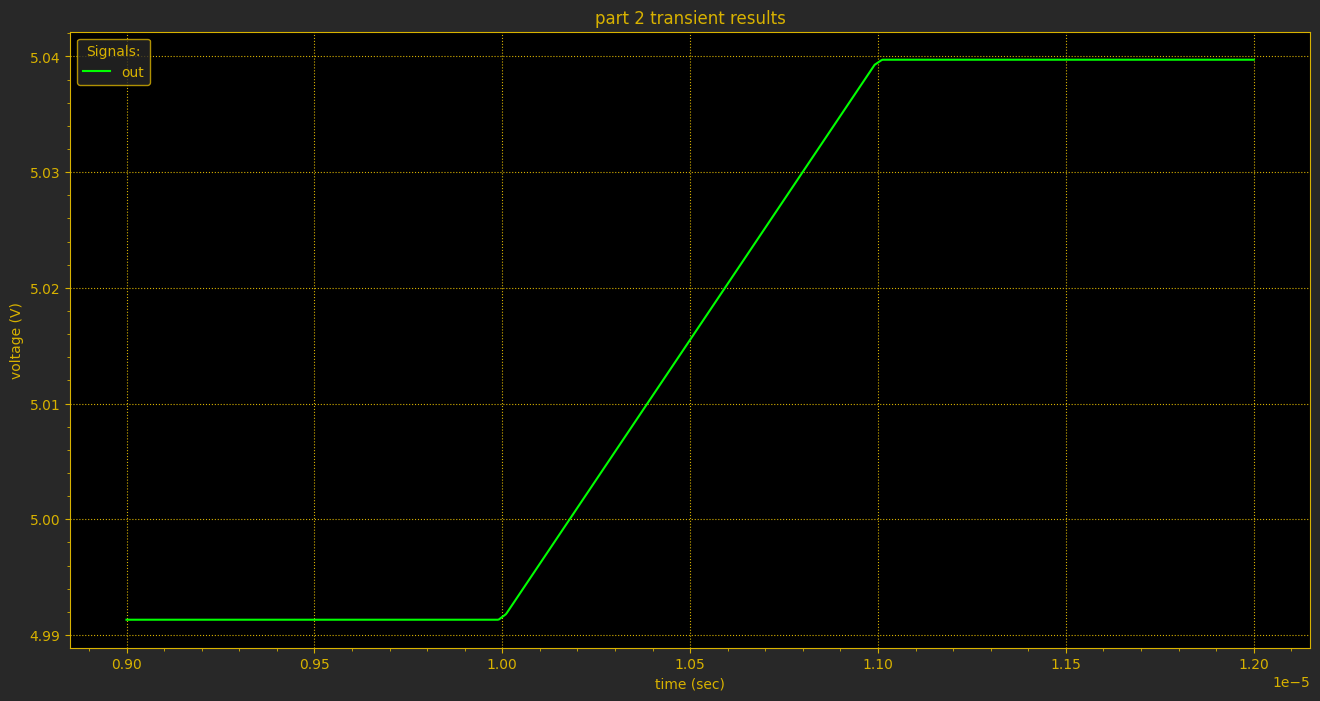


--- Part 2 calculations ---
Open loop gain (DC audio susceptibility): 9.98e-05
---------------------------



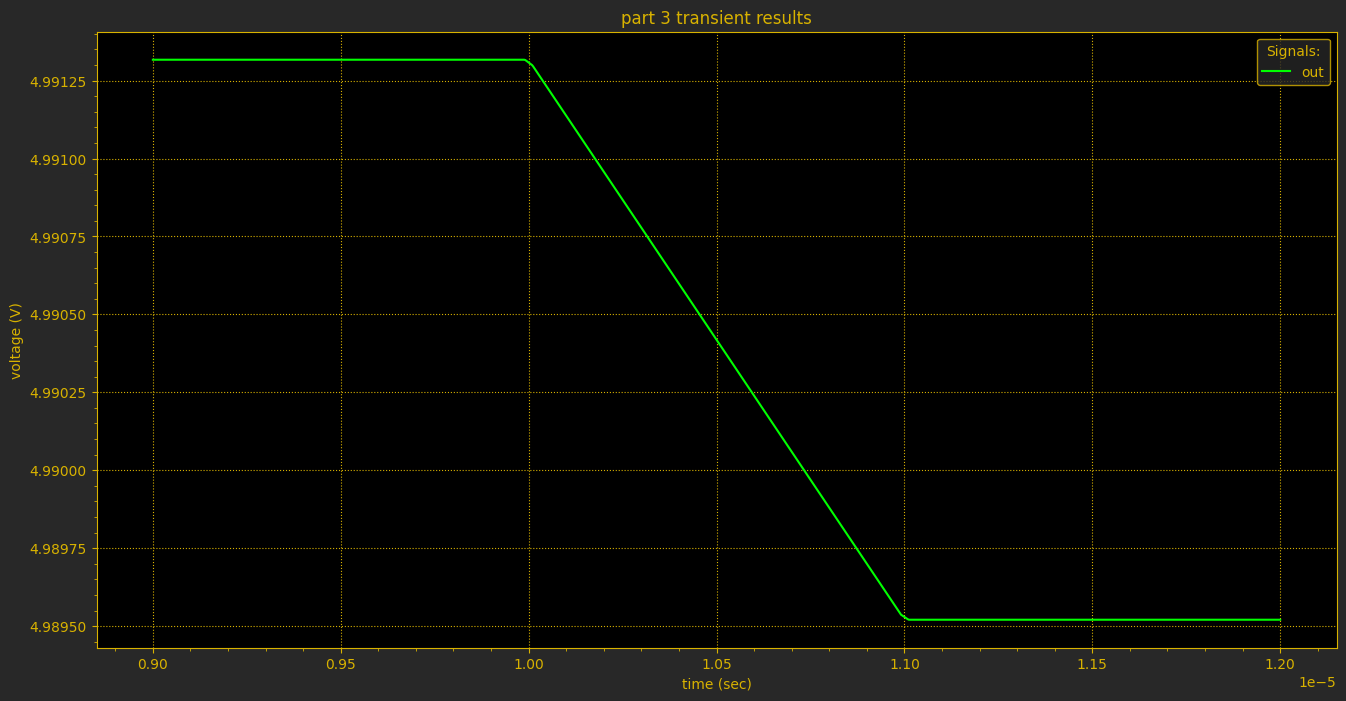


--- Part 3 calculations ---
output impedance: 0.001996
---------------------------



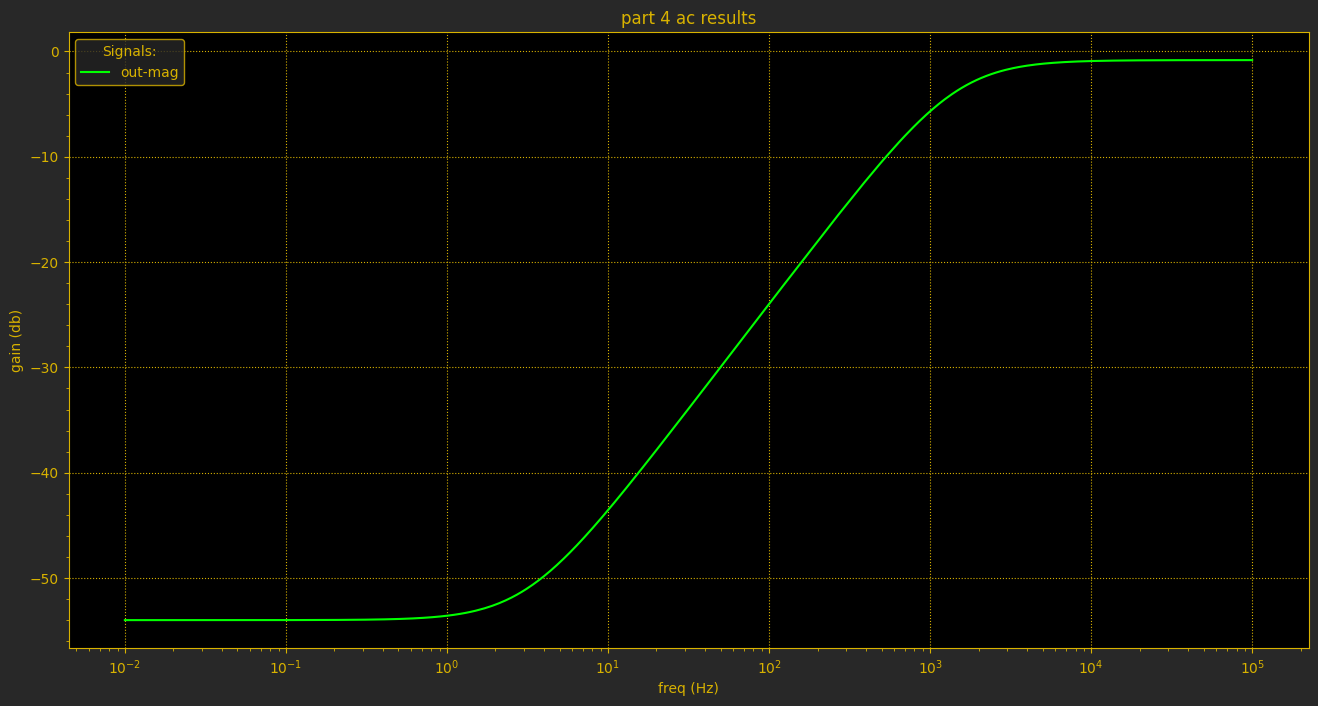


--- Part 4 calculations ---
Zout low freq: -53.997 dB
Zout 100Hz: -23.982 dB
Zout 100Hz: 0.063224 ohms
Zout high freq: -0.82156 dB
L_equivalent: 0.00010062 henry
---------------------------



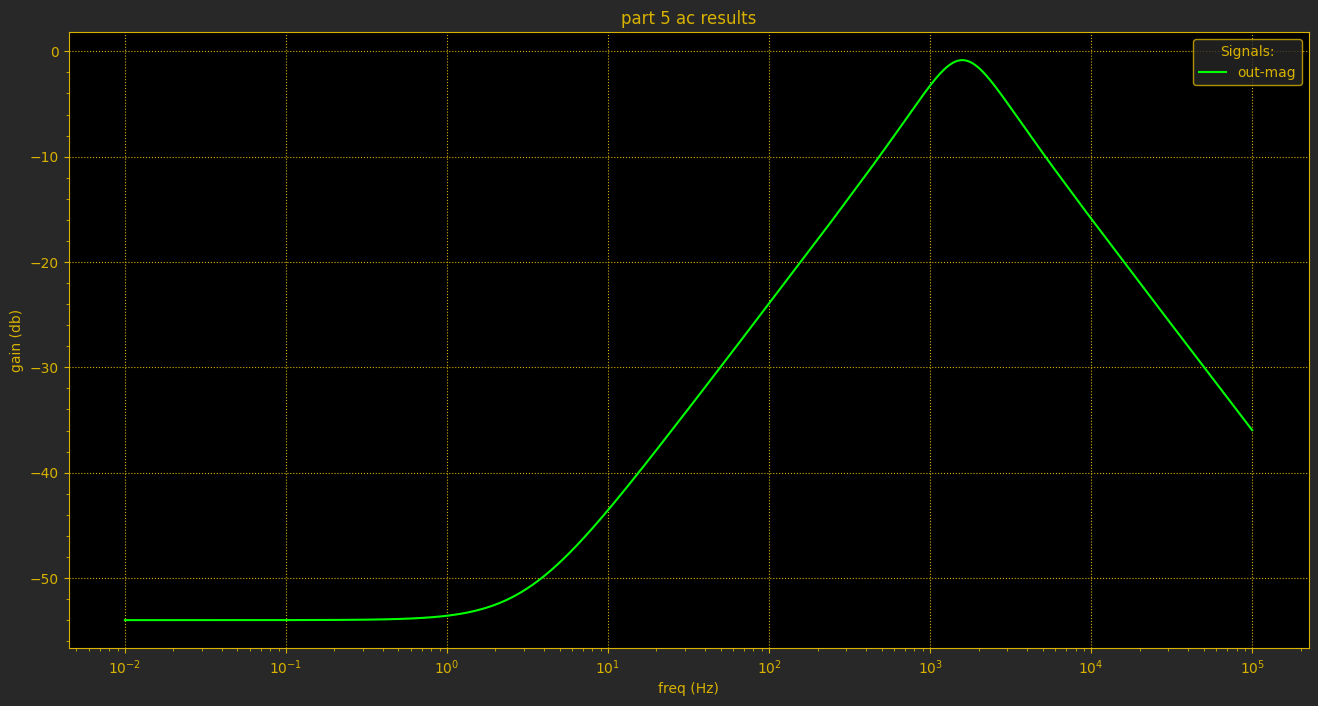


--- Part 5 calculations ---
freq at peak gain: 1584.9 Hz
---------------------------



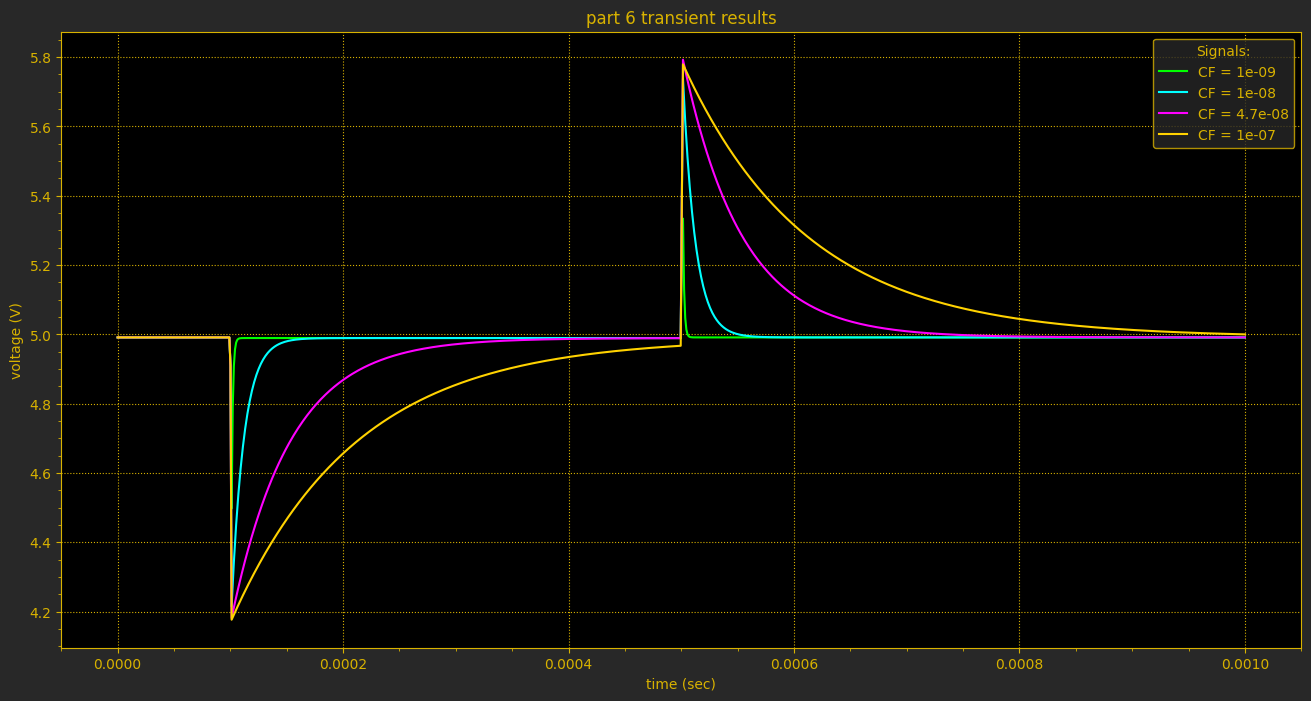


--- Part 6 calculations ---
vout spike: 0.77912 V
---------------------------



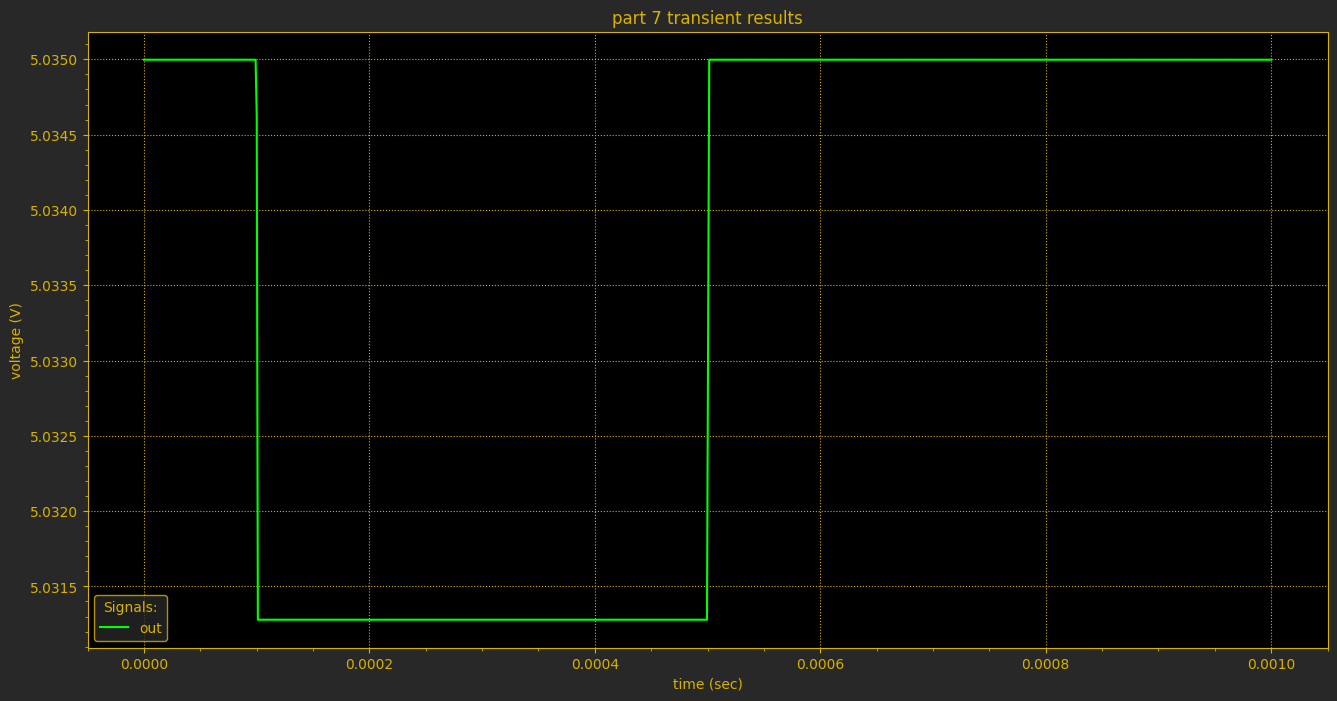


--- Part 7 calculations ---
delta vout: -0.0037186 V
---------------------------



In [12]:
# Execute all parts
netlists_dict = part1(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part2(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part3(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part4(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part5(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part6(paths_dict, netlists_dict, vectors_dict)
netlists_dict = part7(paths_dict, netlists_dict, vectors_dict)